# HOUSE PRICE REGRESSION

In this competition we have to predict the sale price of the each home. We are given 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Importing the other libraries
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from scipy.stats import skew,norm
from scipy.special import boxcox1p,inv_boxcox1p

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

print("Training shape : (%d,%d)"%train.shape)
print("Test shape : (%d,%d)"%test.shape)

Training shape : (1460,81)
Test shape : (1459,80)


In [3]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [6]:
trainid=train['Id']
testid=test['Id']

We have to Predict the Value of Sale Price. 
 In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem.
 
 Variable - Variable name.
Type - Identification of the variables' type. There are two possible values for this field: 'numerical' or 'categorical'. By 'numerical' we mean variables for which the values are numbers, and by 'categorical' we mean variables for which the values are categories.

At Starting Level We will find the Correlation between the varaibles and and Sale Price(Y)
These are steps we are going to follow:

1.Correlation matrix     

2.'SalePrice' correlation matrix 

3.Scatter plots between the most correlated variables 


In [7]:
# for finding the correlation matrix
corr=train.corr()
corr.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [8]:
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

  We can easily see that 
1.  OverallQual  : Overall material and finish quality and it takes Discrete Values
2.  GrLivArea :  Above grade (ground) living area square feet and it is a numerical variable,takes Continuous values
3. Garage Cars : Size of garage in car capacity , takes discrete values
4. Garage Area : Size of garage in square feet , takes Continuous Values
5. TotalBsmtSf  :  Total square feet of basement area , Takes Continuous Values 
6. 1stFrlsf  :  First Floor square feet , Take continuous Values
7. Full Bath : Full bathrooms above grade , Takes Discerete Values
8. TotRmsAbvGrd : Total rooms above grade (does not include bathrooms) , takes Discrete Values
9.  Year Built : Original construction date , Takes Continous Values

These Variables are strong correlated with Sale Price ( The threshold correlation was 0.5 )


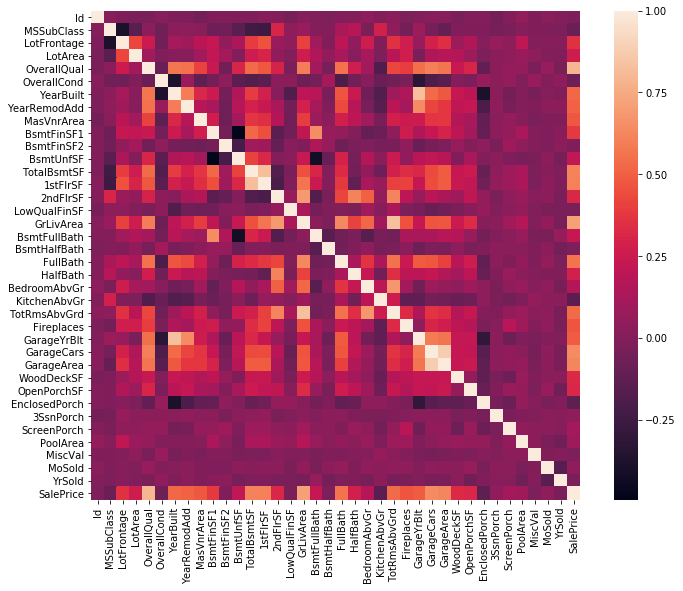

In [9]:
# correlation Matrix in heat map style
a,b=plt.subplots(figsize=(12,9))
sns.heatmap(corr,square=True)

In the Sale Price Row we can see OverallQual,GrvLivArea and some with have more correlation with Sale Price as we have seen with Values above.

# Scatter Plots

## Numerical Variables

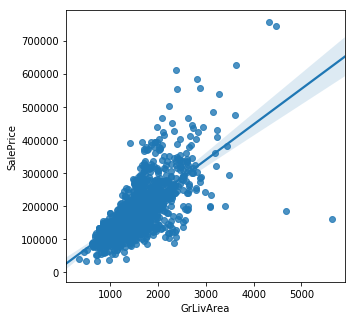

In [10]:
# plt.scatter(train['GrLivArea'],train['SalePrice'])
# plt.xlabel("GrLivarea")
# plt.ylabel("SalePrice")
# plt.show()

plt.subplots(figsize=(5,5))
sns.regplot(train['GrLivArea'],train['SalePrice'])
plt.show()

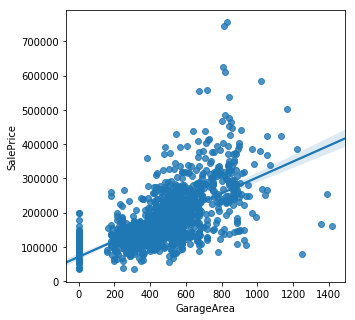

In [11]:
# plt.scatter(train['GarageArea'],train['SalePrice'])
# plt.xlabel("GarageArea")
# plt.ylabel("SalePrice")
plt.subplots(figsize=(5,5))
sns.regplot(train['GarageArea'],train['SalePrice'])
plt.show()

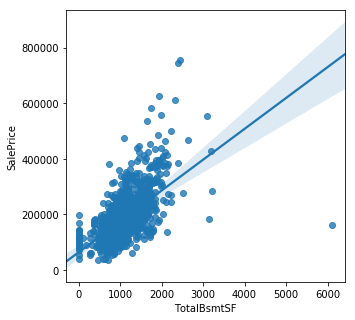

In [12]:
# plt.scatter(train['TotalBsmtSF'],train['SalePrice'])
# plt.xlabel("TotalBsmtSF")
# plt.ylabel("SalePrice")

plt.subplots(figsize=(5,5))
sns.regplot(train['TotalBsmtSF'],train['SalePrice'])
plt.show()

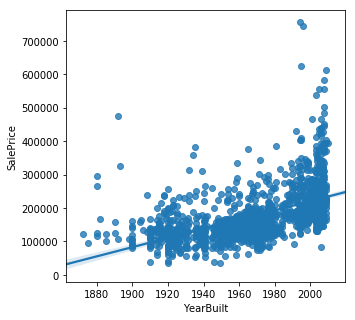

In [13]:
# plt.scatter(train['YearBuilt'],train['SalePrice'])
# plt.xlabel("YearBuilt")
# plt.ylabel("SalePrice")

plt.subplots(figsize=(5,5))
sns.regplot(train['YearBuilt'],train['SalePrice'])
plt.show()

As We see Clearly in Graph these Variables are really good friends of sale price and also we can see some outliers(Grlivarea)

## OUTLIERS

From the graphs i concluded something 

**GrLivArea** : 4 ( all greater than 16.5 values will be removed). In the documentation of the ames dataset the suggestion was to remove all the examples whose grlivarea is greater than 4000

**MasVnrArea** : The one with 13.5(nearly) and 0 Mas Vnr area

**TotalBsmtSF** : The one with greater than 17.5 total basement squared area

**1stFlrSf** : The one with greater than 17 1st floor area

**Garage Area** : four with  1200 garage area and less than 12.75 sale price.

**LowQualFinalSF** : one with greater than 10 lowqualSf and less than 12.75 sale price

**Year Built** : one which has greater than 13.0 sale price and .less than 14.025 year built value


In [14]:
print(train.loc[(train['GrLivArea']>4000)].index)
print(train.loc[(train['GarageArea']>1200) & (train['SalePrice']<350000)].index)
print(train.loc[(train['YearBuilt']<1900) & (train['SalePrice']>400000)].index)
print(train.loc[(train['SalePrice']<500000) & (train['TotalBsmtSF']>3000)].index)

Int64Index([523, 691, 1182, 1298], dtype='int64')
Int64Index([581, 1061, 1190, 1298], dtype='int64')
Int64Index([185], dtype='int64')
Int64Index([332, 496, 523, 1298], dtype='int64')


In [15]:
print(train.shape)
train.drop(axis=0,index=[523,691,1182,1298,581,1061,1190,185,332,496],inplace=True)
print(train.shape)

(1460, 81)
(1450, 81)


## Categorical Features

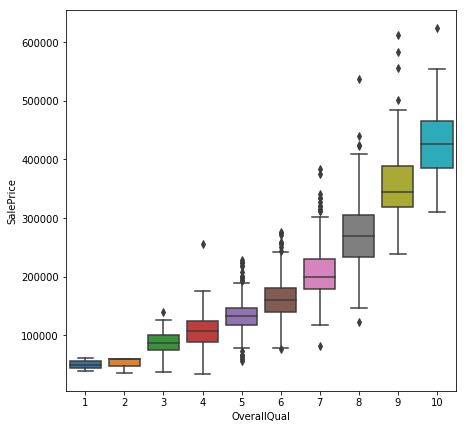

In [16]:
a,b=plt.subplots(figsize=(7,7))
sns.boxplot(train['OverallQual'],train['SalePrice'])

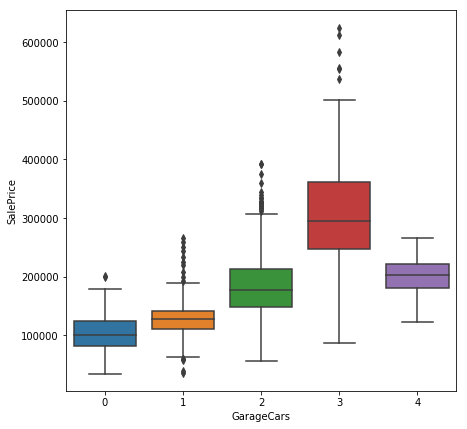

In [17]:
a,b=plt.subplots(figsize=(7,7))
sns.boxplot(train['GarageCars'],train['SalePrice'])

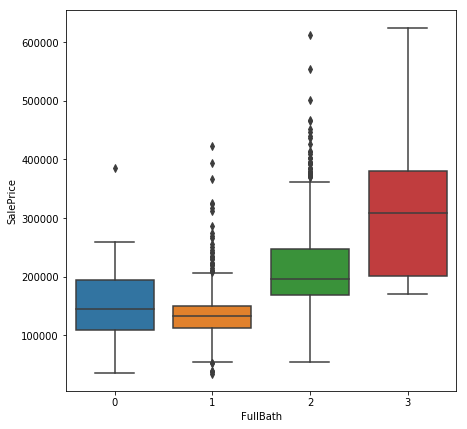

In [18]:
a,b=plt.subplots(figsize=(7,7))
sns.boxplot(train['FullBath'],train['SalePrice'])

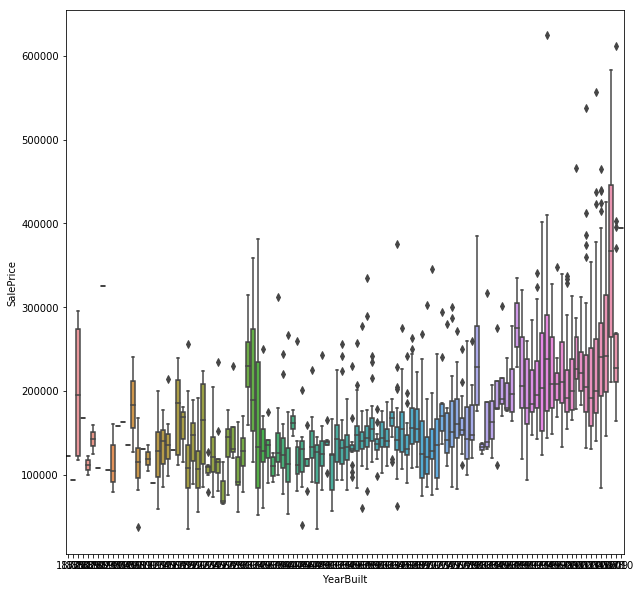

In [19]:
a,b=plt.subplots(figsize=(10,10))
sns.boxplot(train['YearBuilt'],train['SalePrice'])

Somethings to Conclude:

1. OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. ( We have seen the values)

2. 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. But these are somewhat related like cars capacity will also indirectly tell garage Area. So we will take only one and we can see that garage Cars has greater correlation coefficient. So we will keep that

3. 'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF'. 

4. TotRmsAbvGrd' and 'GrLivArea' are same again.

Now We will plot mega Scatter Plot 


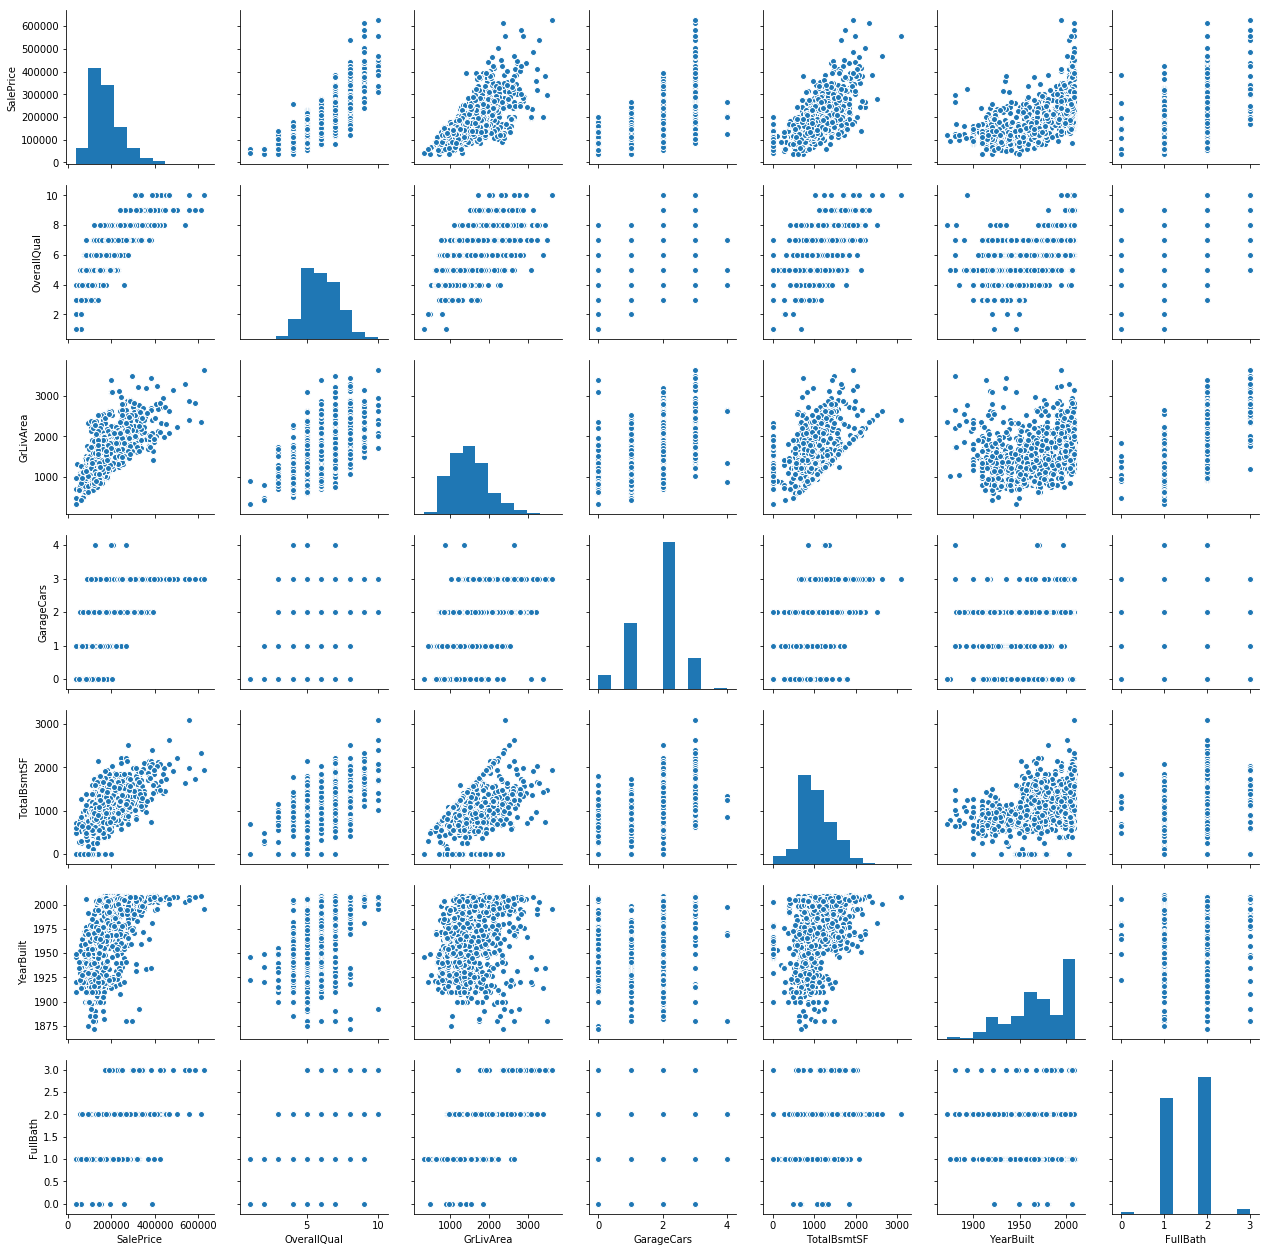

In [20]:
cols=['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','YearBuilt','FullBath']
sns.pairplot(train[cols])

In [21]:
saleprice=train['SalePrice']
Train=train.drop('SalePrice',axis=1)
Train.shape

(1450, 80)

In [22]:
data=pd.concat([Train,test])
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


 Summary of variables I have used :

train: train data with sale price column        ,shape : (1460,81)
 
Train : train data without sale price column  ,shape : (1460,80)

 test : test data                                              ,shape: (1459,80) 

data : Contains both Train and test data        ,shape: (2919,80)

In [23]:
testid=test['Id']
trainid=Train['Id']

Train=Train.drop('Id',axis=1)
test=test.drop('Id',axis=1)

print(Train.shape,test.shape)

(1450, 79) (1459, 79)


In [24]:
data=data.drop('Id',axis=1)
print(data.shape)

(2909, 79)


## TARGET VAIRABLE

The response variable is not transformed using boxcox transformation.In this case, care must be taken because the variance of the residuals is not comparable as λ varies

For more **details** go through this link
- http://onlinestatbook.com/2/transformations/box-cox.html 

Skewness 1.5615504311611146


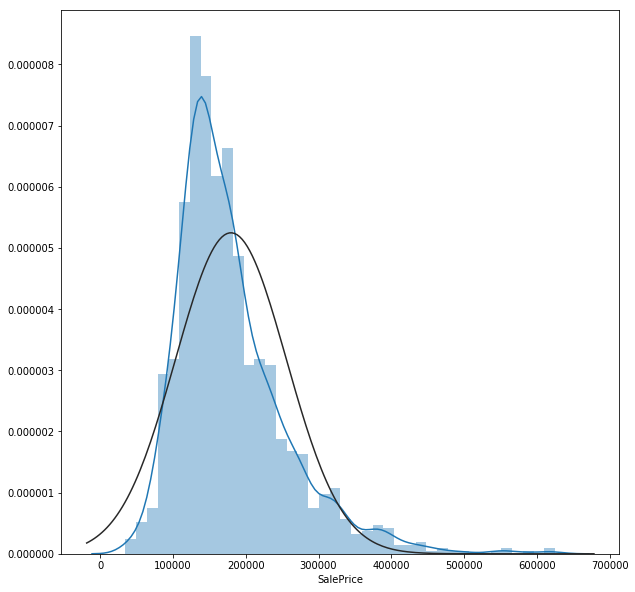

In [25]:
# plot shows that the variable is skewed
plt.subplots(figsize=(10,10))
sns.distplot(train['SalePrice'],fit=norm)

print('Skewness',skew(train.SalePrice))

Skewness 0.057329642886069475


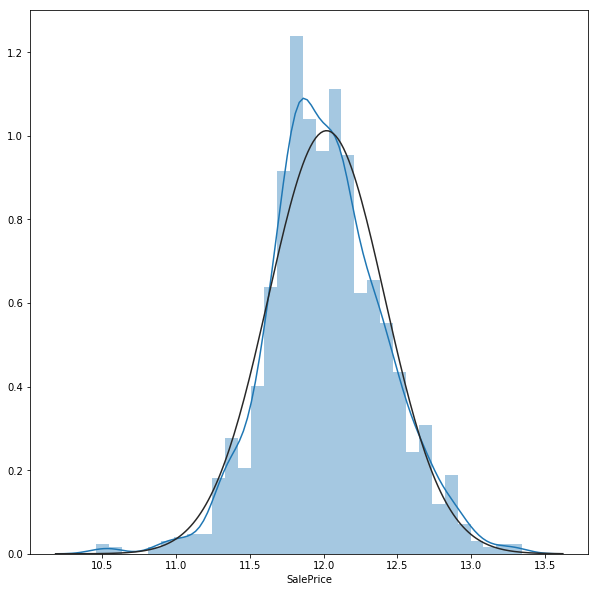

In [26]:
plt.subplots(figsize=(10,10))

# log transformation of the target variable also
train.SalePrice = np.log1p(train.SalePrice )
saleprice=train.SalePrice
# plot
sns.distplot(train['SalePrice'],fit=norm)

# skewness 
print('Skewness',skew(train.SalePrice))

## Missing Data 

In [27]:
length=data.shape[0]
na=pd.DataFrame()

# will represent the percentage of missing values
na['Percent']=(data.isnull().sum()/length)*100
# will represent the number of na values
na['number']=data.isnull().sum()                      

# we will drop the features which have zero na values
na=na.drop(na[na['Percent']==0.0].index)

# percent is column by which we have to sort. 
na.sort_values(by='Percent',ascending=False,inplace=True)
na

,Percent,number
PoolQC,99.724991,2901
MiscFeature,96.424888,2805
Alley,93.193537,2711
Fence,80.440014,2340
FireplaceQu,48.779649,1419
LotFrontage,16.638020,484
GarageFinish,5.465796,159
GarageQual,5.465796,159
GarageCond,5.465796,159
GarageYrBlt,5.465796,159


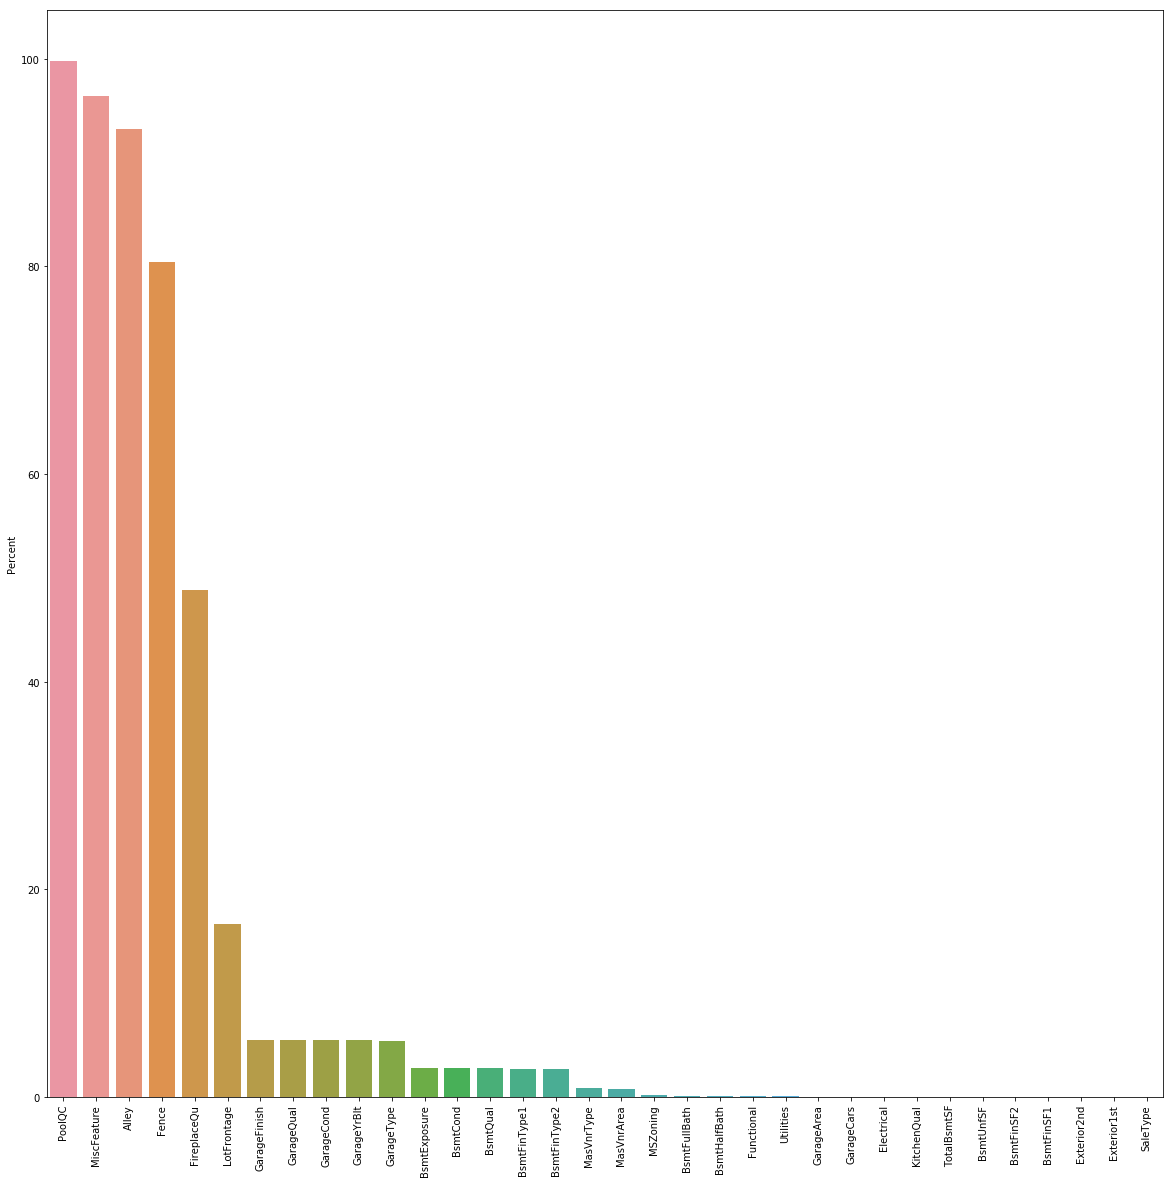

In [28]:
a,b=plt.subplots(figsize=(20,20))
plt.xticks(rotation='90')       # for rotating the features by 90
sns.barplot(x=na.index,y=na['Percent'])

We can easily see that PoolQc,MiscFeature,Alley have greater than 90% missing data 

PoolQc : Pool quality

MiscFeature : Miscellaneous feature not covered in other categories

Alley : Type of alley access

...

## FILLING MISSING VALUES

**PoolQc**: In description.txt Nan means there is no pool available. So we replace the null values with None

**MiscFeature**:  for this also Nan means none

**Alley**: Here also Nan means No alley access

**Fence**: Here also Nan means no fence that is we replace it with none

**FireplaceQu**:  NA means No Fireplace. We will replace it with None

**LotFrontage**:  I will fill the missing value with mean of the data 

**Garagefinish, GarageQual,GarageCond** : Descrpition says that Na means no garage. So filling it with None

**GarageYrblt**: Replacing the null values by zero

**GarageType**: Description says Na means no garage.So replacing the null values by None

**BsmtQual,BsmtCond,BmstExposure**: For all these I will replace Na with None.

**BsmtFintype1,BsmtFintype2**: Na means None here also

**MasVnrType** : here i replaced Na with none.

**MasVnrArea**: Replaced with Zero.

**MSZoning**: Identifies the general zoning classification of the sale. Replacing it with mode.

**BsmtFullbath,BsmtHalfbath**: It represnts basement of full bathrooms and half bathrooms.So replacing it with zero.

**Functional**: Descprition says that it tells about home functionality( conditon for use) and descprition also says that assume typical. So we replace Nan values by typical. 

**Utilities**: It represents the utilities available. For examples gas,electricity,septic tank etc. I will replace the null values with allpub(As it is most frequent). 

** Garage Area,Garage cars** : As null values means there is no garage. So garage area and garage cars will be zero for null values. I will replace the null values by zero.

**Electrical**: It has only one null value. I will replace it with Sbrkr:Standard Circuit Breakers & Romex or mode of the column and mode is equal to Sbrkr.

**KitchenQual** : it tells about the kitchen quality of the house. I will replace it with mode.

**TotalBsmtSf,BsmtUnfSf,BsmtFinSF1,BsmtFinSF2**:  All give the information about basement area. I will replace the null value by zero as null represent no basement.

**Exterior2nd,Exterior1st**: It tells the about exterior covering of the house. As both contains 1 null value so i will replace it with mode. 

**Sale Type**:  As it contains null values I will replace it with mode.

In [29]:
data['PoolQC']=data['PoolQC'].fillna("None")

data['MiscFeature']=data['MiscFeature'].fillna('None')

data['Alley']=data['Alley'].fillna("None")

data['Fence']=data['Fence'].fillna("None")

data['FireplaceQu']=data['FireplaceQu'].fillna("None")

data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].mean())

data['GarageFinish']=data['GarageFinish'].fillna("None")

data['GarageQual']=data['GarageQual'].fillna("None")

data['GarageCond']=data['GarageCond'].fillna("None")

data['GarageYrBlt']=data['GarageYrBlt'].fillna(0)

data['GarageType']=data['GarageType'].fillna("None")

data['BsmtExposure']=data['BsmtExposure'].fillna("None")

data['BsmtCond']=data['BsmtCond'].fillna("None")

data['BsmtQual']=data['BsmtQual'].fillna("None")

data['BsmtFinType1']=data['BsmtFinType1'].fillna("None")

data['BsmtFinType2']=data['BsmtFinType2'].fillna("None")

data['MasVnrType']=data['MasVnrType'].fillna("None")

data['MasVnrArea']=data['MasVnrArea'].fillna(0)

data['MSZoning']=data['MSZoning'].fillna(data['MSZoning'].mode()[0])

data['BsmtFullBath']=data['BsmtFullBath'].fillna(0)

data['BsmtHalfBath']=data['BsmtHalfBath'].fillna(0)

data['Functional']=data['Functional'].fillna("Typ")

data['Utilities']=data['Utilities'].fillna("AllPub")

data['GarageArea']=data['GarageArea'].fillna(0)

data['GarageCars']=data['GarageCars'].fillna(0)

data['Electrical']=data['Electrical'].fillna(data['Electrical'].mode()[0])

data['KitchenQual']=data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])

data['TotalBsmtSF']=data['TotalBsmtSF'].fillna(0)

data['BsmtUnfSF']=data['BsmtUnfSF'].fillna(0)

data['BsmtFinSF1']=data['BsmtFinSF1'].fillna(0)

data['BsmtFinSF2']=data['BsmtFinSF2'].fillna(0)

data['Exterior1st']=data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])

data['Exterior2nd']=data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])

data['SaleType']=data['SaleType'].fillna(data['SaleType'].mode()[0])

I have replaced all the missing values. Before that we will see any values  are remaining(cross verification)

In [30]:
(data.isnull().sum()!=0).sum()

0

 We have replaced all the **missing values**. Now it's time to do some feature engineering. Before going further we will seperate the numerical and categorical features.
 
Some variables are really categorical. We will convert these variables to categorical.Some variables are ordinal variables. So i will label encode them. 

In [31]:
data['MSSubClass']=data['MSSubClass'].astype(str)
data['YrSold']=data['YrSold'].astype(str)
data['MoSold']=data['MoSold'].astype(str)

## CREATING NEW FEATURES 

Total area is sum of basement area, 1st floor area and 2nd floor area.

In [32]:
# data['FloorArea']=data['1stFlrSF']+data['2ndFlrSF']
data['TotalArea']=data['TotalBsmtSF']+data['GrLivArea']
# data['OverallQual-squared']=data['OverallQual']**2

# data['OverallQual-cube']=data['OverallQual']**3

# data['GarageCars-squared']=data['GarageCars']**2

Now let's explore **Utilities**. We have filled the utilities with **AllPub**

In [33]:
test['Utilities'].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [34]:
test['Utilities'].isnull().sum()

2

Here we can easily observe in test data utilities takes only one value and that is AllPub and there are only 2 null values and we have filled it with allpub. So in total test set utilities takes only value and that is all pub. So it obvious that is not useful for prediction. So I am removing that varaible from the data. 

In [35]:
print(data.shape)
data.drop('Utilities',axis=1,inplace=True)
print(data.shape)

(2909, 80)
(2909, 79)


## CATEGORICAL VARAIBLES 

In [36]:
categorical_feats=data.dtypes[data.dtypes=='object'].index
categorical=data[categorical_feats]
print("Number of categorical features are",categorical_feats.shape[0])
print(categorical_feats)

Number of categorical features are 45
Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')


## LABEL ENCODING

Some Categorical variables are ordered. So I will encode them. A good way to find the ordinal variables is that the distance between each class is equal(to be assumed).

And for regression problems, label encoding is more used and for classificationn problems one hot encoding is used.

YrSold,MoSold -  for these two varaibles if we label encode then or one hot encode them there is no change in the score.

OverallQual,OverallCond - these varaibles when encoded the error increased. So there is no need to encode them as there type is integer.

Electrical,Street,Alley,CentralAir- if we label encode then the error was more when compared with the error when we one hot encode them.

In [37]:
# labels=['LotShape','LandSlope','ExterQual',
#         'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
#        'HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish',
#        'GarageQual','GarageCond','PavedDrive','PoolQC','Fence',
#         'MSSubClass','YrSold','MoSold']


# # Electrical,Street,Alley,CentralAir

# print("Number of ordinal variables are",len(labels))

# le=LabelEncoder()
# for i in labels:
#     data[i]=pd.Series(le.fit_transform(np.array(data[i])))

In [38]:
# categorical_feats=data.dtypes[data.dtypes=='object'].index
# categorical=data[categorical_feats]
# print("Number of categorical features are",categorical_feats.shape[0])
# print(categorical_feats)

## NUMERICAL FEATURES

In [39]:
numerical_feats=data.dtypes[data.dtypes!='object'].index
numerical=data[numerical_feats]
print("The Lenght of Numerical Varaibles are",numerical_feats.shape[0])
print(numerical_feats)


# k=['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
#        'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
#        'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
#        'CentralAir', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Fence',
#        'FireplaceQu', 'Fireplaces', 'FullBath', 'Functional', 'GarageArea',
#        'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageYrBlt',
#        'GrLivArea', 'HalfBath', 'HeatingQC', 'KitchenAbvGr', 'KitchenQual',
#        'LandSlope', 'LotArea', 'LotFrontage', 'LotShape', 'LowQualFinSF',
#        'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF',
#        'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'PoolQC',
#        'ScreenPorch', 'Street', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
#        'YearBuilt', 'YearRemodAdd', 'YrSold', 'TotalSF']

# print(set(k)-set(numerical_feats))
# print(set(numerical_feats)-set(k))

The Lenght of Numerical Varaibles are 34
Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'TotalArea'],
      dtype='object')


In [40]:
skewness=numerical.apply(lambda x : skew(x))
skewness.sort_values(ascending=False,inplace=True)
print(skewness.shape[0])
skewness

34


MiscVal          21.919304
PoolArea         18.682408
LotArea          13.188969
LowQualFinSF     12.394704
3SsnPorch        11.356127
KitchenAbvGr      4.293726
BsmtFinSF2        4.148795
EnclosedPorch     4.011511
BsmtHalfBath      3.938080
ScreenPorch       3.926850
MasVnrArea        2.602896
OpenPorchSF       2.533691
WoodDeckSF        1.851174
1stFlrSF          1.227268
LotFrontage       1.224044
BsmtFinSF1        0.977085
GrLivArea         0.959784
BsmtUnfSF         0.914249
TotalArea         0.910753
2ndFlrSF          0.839337
TotRmsAbvGrd      0.743738
Fireplaces        0.728154
HalfBath          0.698699
BsmtFullBath      0.624038
TotalBsmtSF       0.600341
OverallCond       0.563377
BedroomAbvGr      0.329506
OverallQual       0.181589
GarageArea        0.167315
FullBath          0.157822
GarageCars       -0.225980
YearRemodAdd     -0.448386
YearBuilt        -0.596588
GarageYrBlt      -3.898291
dtype: float64

If skewness = 0, the data are perfectly symmetrical. But a skewness of exactly zero is quite unlikely for real-world data, so how can you interpret the skewness number.A classic — suggests this rule of thumb:

- If skewness is less than −1 or greater than +1, the distribution is highly skewed.

- If skewness is between −1 and 0.5 or between 0.5 and +1, the distribution moderately skewed.

- If skewness is between -0.5 and +0.5, the distribution is approximately symmetric.

In [41]:
# log transformation of the skewed features.
skewness=skewness[abs(skewness)>0.5]
print("The features that got transformed are :")
print(list(skewness.index))
print("\nThe number of features that got transformed:")
print(skewness.shape[0])
# print(skewness)
for i in skewness.index:
    data[i]=boxcox1p(np.array(data[i]),0.15)

# data[skewness.index]=np.log1p(data[skewness.index])
# print(data.shape)

The features that got transformed are :
['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch', 'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch', 'BsmtHalfBath', 'ScreenPorch', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', '1stFlrSF', 'LotFrontage', 'BsmtFinSF1', 'GrLivArea', 'BsmtUnfSF', 'TotalArea', '2ndFlrSF', 'TotRmsAbvGrd', 'Fireplaces', 'HalfBath', 'BsmtFullBath', 'TotalBsmtSF', 'OverallCond', 'YearBuilt', 'GarageYrBlt']

The number of features that got transformed:
28


## LABEL ENCODING

Some Categorical variables are ordered. So I will encode them. A good way to find the ordinal variables is that the distance between each class is equal(to be assumed).

And for regression problems, label encoding is more used and for classificationn problems one hot encoding is used.

YrSold,MoSold -  for these two varaibles if we label encode then or one hot encode them there is no change in the score.

OverallQual,OverallCond - these varaibles when encoded the error increased. So there is no need to encode them as there type is integer.

Electrical,Street,Alley,CentralAir- if we label encode then the error was more when compared with the error when we one hot encode them.

In [42]:
labels=['LotShape','LandSlope','ExterQual',
        'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
       'HeatingQC','KitchenQual','FireplaceQu','GarageFinish'
       ,'GarageQual','GarageCond','PoolQC','PavedDrive','Fence','YrSold','MoSold','Functional'
       ,'MSSubClass']


# 'MSSubClass','Functional''PavedDrive' ,'Fence'

print("Number of ordinal variables are",len(labels))

le=LabelEncoder()
for i in labels:
    data[i]=pd.Series(le.fit_transform(np.array(data[i])))

Number of ordinal variables are 22


In [43]:
categorical_feats=data.dtypes[data.dtypes=='object'].index
categorical=data[categorical_feats]
print("Number of categorical features are",categorical_feats.shape[0])
print(categorical_feats)

Number of categorical features are 23
Index(['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')


In [44]:
data.shape

(2909, 79)

## TRAIN AND TEST DATA

In [45]:
# t=train.SalePrice
# train=data.head(1460).copy()
# train['SalePrice']=t
# train.shape

# test=data.tail(1459).copy()
# test.shape

## OUTLIERS

# m=train.shape[0]
# t=train.SalePrice
# train=data.head(m).copy()                    # we will make a copy. 
# train['SalePrice']=t
# train.head(10)

# for i in numerical_feats:
#     sns.regplot(train[i],train['SalePrice'])
#     plt.show()

# for i in (list(labels)+list(categorical_feats)):
#     plt.xticks(rotation=90)          # for rotation
#     sns.boxplot(train[i],train['SalePrice'])
#     plt.show()

# From the graphs i concluded something 

# **GrLivArea** : 4 ( all greater than 16.5 values will be removed). In the documentation of the ames dataset the suggestion was to remove all the examples whose grlivarea is greater than 4000

# **MasVnrArea** : The one with 13.5(nearly) and 0 Mas Vnr area

# **TotalBsmtSF** : The one with greater than 17.5 total basement squared area

# **1stFlrSf** : The one with greater than 17 1st floor area

# **Garage Area** : four with  1200 garage area and less than 12.75 sale price.

# **LowQualFinalSF** : one with greater than 10 lowqualSf and less than 12.75 sale price

# **Year Built** : one which has greater than 13.0 sale price and .less than 14.025 year built value



# print("GrLivArea",train.loc[train['GrLivArea']>16.5].index.values)
# print("MasVnrArea",train.loc[(train['MasVnrArea']<0.5) & (train['SalePrice']>13.25)].index.values)
# print("TotalBsmtSF",train.loc[train['TotalBsmtSF']>17.5].index.values)
# print("1st floor area",train.loc[train['1stFlrSF']>17].index.values)
# print("garage area",train.loc[(train['GarageArea']>1200) & (train['SalePrice']<12.775)].index.values)
# print("LowQualFinalSF",train.loc[(train['LowQualFinSF']>10) & (train['SalePrice']>12.75)].index.values)
# print("Year Built",train.loc[(train['SalePrice']>12.8) & (train['YearBuilt']<14.05)].index.values)



# Now from the above we can easily see that 1182,1298 are really harmful for prediciton.


## Converting the categorical features to dummy vairables

In [46]:
data.shape

(2909, 79)

In [47]:
data=pd.get_dummies(data)
data.shape

(2909, 224)

In [48]:
data.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,10,5.831328,19.212182,3,0,7,2.055642,14.187527,2003,8.059126,...,0,0,0,1,0,0,0,0,1,0
1,5,6.221214,19.712205,3,0,6,2.602594,14.145138,1976,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,10,5.914940,20.347241,0,0,7,2.055642,14.184404,2002,7.646538,...,0,0,0,1,0,0,0,0,1,0
3,11,5.684507,19.691553,0,0,7,2.055642,14.047529,1970,0.000000,...,0,0,0,1,1,0,0,0,0,0
4,10,6.314735,21.325160,0,0,8,2.055642,14.182841,2000,9.391827,...,0,0,0,1,0,0,0,0,1,0


## REMOVAL OF OTHER UNNECESSARY VARIABLES

The main thing here I want to address is that there are some features in train data whose value is same and there are some in test data.In the **Utilities** case we have seen that in test data utilities takes only one value. So i have removed it. Like this there can be many variables which we have to find out and remove them.

In [49]:
# train.head()

# data.head()

# m=train.shape[0]
# train=data.head(m).copy()
# test=data.tail(1459).copy()

# test.head()

# data.head()

# k=[]
# for i in train.columns:
#     sigma=train[i].var()
# #     print(sigma)
#     if(sigma<=0.0025):
#         k.append(i)
# print(len(k))
# print(k)

# l=[]
# for i in test.columns:
#     sigma=test[i].var()
# #     print(sigma)
#     if(sigma<=0.0025):
#         l.append(i)
# print(len(l))
# print(l)

# p=list(set(k).union(set(l)))
# len(p)

# train.drop(axis=1,columns=p,inplace=True)
# test.drop(axis=1,columns=p,inplace=True)

# data=pd.concat([train,test],axis=0)
# data.shape

In [50]:
# data.head()

In [51]:
# train=data.iloc[0:1450,:]
# test=data.iloc[1450:,:]
# print(train.shape,test.shape)

In [52]:
# k=[]
# v=0.0055                         
# for i in train.columns:
#     sigma=train[i].var()
# #     print(sigma)
#     if(sigma<=v):
#         k.append(i)
# print("The number of features are %d and the features are:"%len(k))
# print(k,"\n")

# ## test data 
# l=[]
# for i in test.columns:
#     sigma=test[i].var()
# #     print(sigma)
#     if(sigma<=v):
#         l.append(i)        
# print("The number of features are %d and the features are:"%len(l))
# print(l,"\n")

# ## combining the features 
# p=list(set(k).union(set(l)))
# # p.remove('YearBuilt')
# print("The number of features that are in common",len(p))

In [53]:
# train.drop(axis=1,columns=p,inplace=True)
# test.drop(axis=1,columns=p,inplace=True)
# print(train.shape,test.shape)

In [54]:
# data=pd.concat([train,test],axis=0)
# data.shape

## TRAINING AND TEST MATRICES

In [55]:
train.shape

(1450, 81)

In [56]:
# training set has a size of 1450 that is after removal of outlier's
m=train.shape[0]
print(m)
X=data.iloc[0:m,:].values

# test set has a size of 1459
X_test=data.iloc[m:,:].values

y=np.array(saleprice)
print("Training size : (%d,%d)"%X.shape)
print("Test size : (%d,%d)"%X_test.shape)
print("Target Varaible Size: (%d,)"%y.shape)

1450
Training size : (1450,224)
Test size : (1459,224)
Target Varaible Size: (1450,)


## CROSS VALIDATION

In [57]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.1,random_state=0)

print("Training size : (%d,%d)"%X_train.shape)
print("Cross validation size : (%d,%d)"%X_val.shape)
print("Target Varaible training Size: (%d,)"%y_train.shape)
print("Target Varaible validation Size: (%d,)"%y_val.shape)

Training size : (1305,224)
Cross validation size : (145,224)
Target Varaible training Size: (1305,)
Target Varaible validation Size: (145,)


# MODELS

Before modelling we will make a function which can calculate root mean squared logarithmic error.

In [58]:
def rmsle(y_true,y_pred):
    if y_pred.shape[0]!=y_true.shape[0]:
        print("Error! Array Shapes are not same")
        return
    number_of_examples=y_true.shape[0]
    y_true=np.log(y_true)
    y_pred=np.log(y_pred)
    error=math.sqrt(np.sum(np.square(y_true-y_pred))/number_of_examples)
    return error

## LINEAR REGRESSION

In [59]:
lr=LinearRegression()
lr.fit(X_train,y_train)
print("Training Score:",rmsle(np.expm1(y_train),np.expm1(lr.predict(X_train))))
print("Validation Score:",rmsle(np.expm1(y_val),np.expm1(lr.predict(X_val))))

Training Score: 0.0963580022530867
Validation Score: 0.10755901828041999


## RIDGE REGRESSION

In [60]:
# GRID SEARCH
parameters=[{'alpha':[0.01,0.03,0.06,0.1,0.3,0.6,1,2,3,4,5,6,7,8,9,10]}]
ridge=Ridge()
gridsearch=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_log_error',cv=10)
gridsearch.fit(X_train,y_train)
gridsearch.best_params_
# gridsearch.fit()

{'alpha': 8}

In [61]:
a=gridsearch.best_params_['alpha']
ridge=Ridge(alpha=a)
ridge.fit(X_train,y_train)
print("Training Score:",rmsle(np.expm1(y_train),np.expm1(ridge.predict(X_train))))
print("Validation Score:",rmsle(np.expm1(y_val),np.expm1(ridge.predict(X_val))))

Training Score: 0.10226416651030473
Validation Score: 0.09839689158926464


## LASSO

In [62]:
parameters=[{'alpha':[0.0003,0.0004,0.0005,0.0006,0.0007,0.001,0.003,0.01,0.03,0.06,0.1]}]
lasso=Lasso(random_state=42)
gridsearch=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_log_error',cv=10)
gridsearch.fit(X_train,y_train)
gridsearch.best_params_

{'alpha': 0.0005}

In [63]:
a=gridsearch.best_params_['alpha']
lasso=Lasso(alpha=a,random_state=42)
lasso.fit(X_train,y_train)
print("Number of variables lasso used is",np.sum(lasso.coef_!=0))
print("Training Score:",rmsle(np.expm1(y_train),np.expm1(lasso.predict(X_train))))
print("Validation Score:",rmsle(np.expm1(y_val),np.expm1(lasso.predict(X_val))))

Number of variables lasso used is 99
Training Score: 0.10518345340935806
Validation Score: 0.09753921730218407


## GRADIENT BOSSITING

In [64]:
xgb=XGBRegressor(learning_rate=0.1,n_estimators=100,random_state=42)
xgb.fit(X_train,y_train)
print("Training Score:",rmsle(np.expm1(y_train),np.expm1(xgb.predict(X_train))))
print("Validation Score:",rmsle(np.expm1(y_val),np.expm1(xgb.predict(X_val))))

Training Score: 0.08598693168476369
Validation Score: 0.11196442006860044


## ELASTIC NET

In [65]:
parameters=[{'alpha':[0.0003,0.0004,0.0005,0.0006,0.0008,0.0009,0.001]}]
eln=ElasticNet(random_state=42)
gridsearch=GridSearchCV(eln,parameters,scoring='neg_mean_squared_log_error',cv=10)
gridsearch.fit(X_train,y_train)
gridsearch.best_params_

{'alpha': 0.0009}

In [66]:
a=gridsearch.best_params_['alpha']
eln=ElasticNet(alpha=a,random_state=42)
eln.fit(X_train,y_train)
# print("Number of variables lasso used is",np.sum(lasso.coef_!=0))
print("Training Score:",rmsle(np.expm1(y_train),np.expm1(eln.predict(X_train))))
print("Validation Score:",rmsle(np.expm1(y_val),np.expm1(eln.predict(X_val))))

Training Score: 0.10487465315244056
Validation Score: 0.09747650127043478


##  PREDICTIONS

In [67]:
y_lasso=lasso.predict(X_test)
y_lasso=inv_boxcox1p(y_lasso,0.000)
ans=pd.DataFrame()
ans['Id']=testid
ans['SalePrice']=y_lasso
ans.head(10)

,Id,SalePrice
0,1461,123840.838413
1,1462,163934.219809
2,1463,192042.717087
3,1464,204327.376556
4,1465,203532.359654
5,1466,170594.451592
6,1467,181979.694757
7,1468,163282.401705
8,1469,203997.570184
9,1470,119605.212322


In [68]:
ans.to_csv("lasso.csv",index=False)     # 0.1285

In [69]:
y_ridge=ridge.predict(X_test)
y_ridge=np.expm1(y_ridge)
ans=pd.DataFrame()
ans['Id']=testid
ans['SalePrice']=y_ridge
ans.head(10)

,Id,SalePrice
0,1461,122070.705789
1,1462,162389.922485
2,1463,191266.352940
3,1464,200384.912660
4,1465,204037.944784
5,1466,170117.661482
6,1467,179355.696482
7,1468,164524.466345
8,1469,200822.786887
9,1470,119625.453703


In [70]:
ans.to_csv("Ridge.csv",index=False)        # 0.12749

In [71]:
y_eln=np.expm1(eln.predict(X_test))
y_eln

array([ 123740.62761381,  164078.58911148,  192160.75699868, ...,
        172785.75949309,  117827.5740481 ,  231212.87848412])

In [72]:
m=X_train.shape[0]

y1=(lasso.predict(X_train)).reshape((m,1))
y2=(ridge.predict(X_train)).reshape((m,1))
y3=(xgb.predict(X_train)).reshape((m,1))
y4 =(lr.predict(X_train)).reshape((m,1))
y5 =(eln.predict(X_train)).reshape((m,1))
X_new=np.hstack((y1,y2,y3,y4,y5))
# print(X_new.shape)

correlation=np.corrcoef(X_new.T)
print("The correlation matrix of training predictions is\n",correlation)
m1=X_val.shape[0]

y1=(lasso.predict(X_val)).reshape((m1,1))
y2=(ridge.predict(X_val)).reshape((m1,1))
y3=(xgb.predict(X_val)).reshape((m1,1))
y4 =(lr.predict(X_val)).reshape((m1,1))
y5 =(eln.predict(X_val)).reshape((m1,1))

X_new=np.hstack((y1,y2,y3,y4,y5))

correlation=np.corrcoef(X_new.T)
print("The correlation matrix of validatoin predictions is\n",correlation)

The correlation matrix of training predictions is
 [[ 1.          0.99879446  0.98640512  0.99392052  0.99998417]
 [ 0.99879446  1.          0.9862771   0.99600382  0.99898808]
 [ 0.98640512  0.9862771   1.          0.9850184   0.98643673]
 [ 0.99392052  0.99600382  0.9850184   1.          0.9941442 ]
 [ 0.99998417  0.99898808  0.98643673  0.9941442   1.        ]]
The correlation matrix of validatoin predictions is
 [[ 1.          0.99851679  0.98215631  0.99239795  0.99998522]
 [ 0.99851679  1.          0.98282226  0.99488033  0.99876654]
 [ 0.98215631  0.98282226  1.          0.97968942  0.9822969 ]
 [ 0.99239795  0.99488033  0.97968942  1.          0.99272738]
 [ 0.99998522  0.99876654  0.9822969   0.99272738  1.        ]]


 The **correlation** between our predictions is really **high**. The predictions of elastic net and lasso is 0.999 (Lol!) 

## ENSEMBLE

### SIMPLE AVERAGING AND WEIGHTED AVERAGING.

In [73]:
  ## weighted average.
# y_ensemble=y_ridge*0.6+y_lasso*0.2+0.2*y_eln
# ans1=pd.DataFrame()
# ans1['Id']=testid
# ans1['SalePrice']=y_ensemble
# ans1.to_csv("ensemble.csv",index=False)
# ans1.head(10)

# y.shape


# THIS IS SOME DIFFERNET METHOD I TRIED BUT THE SCORE GOT WORST.



# y1=(lasso.predict(X)).reshape((1450,1))
# y2=(ridge.predict(X)).reshape((1450,1))
# y3=(xgb.predict(X)).reshape((1450,1))
# y4 =(lr.predict(X)).reshape((1450,1))
# y5 =(eln.predict(X)).reshape((1450,1))
# print(y1.shape,y2.shape,y3.shape,y4.shape,y5.shape)

# X_new=np.hstack((y1,y2,y3,y4,y5))
# print(X_new.shape)
# X_new=np.hstack((y1,y2,y3,y4,y5))
# print(X_new.shape)

# correlation=np.corrcoef(X_new.T)
# print(correlation)
# correlation=np.corrcoef(X_new.T)
# print(correlation)

# X_new_train,X_new_val,y_new_train,y_new_val=train_test_split(X_new,y,test_size=0.1,random_state=0)
# print(X_new_train.shape)
# print(X_new_val.shape)
# print(y_new_train.shape)
# print(y_new_val.shape)

# lr1=LinearRegression()
# lr1.fit(X_new_train,y_new_train)
# print("Training Score",rmsle(np.expm1(y_new_train),np.expm1(lr1.predict(X_new_train))))
# print("validation Score",rmsle(np.expm1(y_new_val),np.expm1(lr1.predict(X_new_val))))

# l=Ridge(alpha=0.01)
# l.fit(X_new_train,y_new_train)
# print("Training Score",rmsle(np.expm1(y_new_train),np.expm1(l.predict(X_new_train))))
# print("validation Score",rmsle(np.expm1(y_new_val),np.expm1(l.predict(X_new_val))))

# ls=Lasso(alpha=0.0006,random_state=0)
# ls.fit(X_new_train,y_new_train)
# print("Training Score",rmsle(np.expm1(y_new_train),np.expm1(ls.predict(X_new_train))))
# print("validation Score",rmsle(np.expm1(y_new_val),np.expm1(ls.predict(X_new_val))))


# k1=lasso.predict(X_test).reshape((1459,1))
# k2=ridge.predict(X_test).reshape((1459,1))
# k3=xgb.predict(X_test).reshape((1459,1))
# k4=lr.predict(X_test).reshape((1459,1))
# k5=eln.predict(X_test).reshape((1459,1))

# X_new_test=np.hstack((k1,k2,k3,k4,k5))
# y_last=ls.predict(X_new_test)
# y_last=np.expm1(y_last)
# print(y_last.shape)

# ans=pd.DataFrame()
# ans['Id']=testid
# ans['SalePrice']=y_last
# ans.to_csv("two_model.csv",index=False)
# ans.head(10)

### BAGGING

I tried bagging on xgb,elasticNet,lasso. The score has not changed much. Actually the score in validation data has not changed. I have even tried with bags equal to 400 and the score has not changed.

In [74]:
# bagging
model=ElasticNet(alpha=0.0006)
seed=0
bags=100

predictions_train=np.zeros((X_train.shape[0],bags))
predictions_val=np.zeros((X_val.shape[0],bags))
for i in range(bags):
    model.set_params(random_state=(seed+i))
    model.fit(X_train,y_train)
    predictions_train[:,i]=model.predict(X_train)
    predictions_val[:,i]=model.predict(X_val)

print(predictions_train.shape)
print(predictions_val.shape)

predictions_train=np.sum(predictions_train,axis=1)/bags
predictions_val=np.sum(predictions_val,axis=1)/bags

print(predictions_train.shape)
print(predictions_val.shape)

print("Training Score:",rmsle(np.expm1(y_train),np.expm1(predictions_train)))
print("Validation Scoe:",rmsle(np.expm1(y_val),np.expm1(predictions_val)))

(1305, 100)
(145, 100)
(1305,)
(145,)
Training Score: 0.10286077450925482
Validation Scoe: 0.09707333979920447


## BOOSTING

In [75]:
ada=AdaBoostRegressor(ridge,random_state=42)
ada.fit(X_train,y_train)
print("Training Score:",rmsle(np.expm1(y_train),np.expm1(ada.predict(X_train))))
print("Validation Score:",rmsle(np.expm1(y_val),np.expm1(ada.predict(X_val))))

Training Score: 0.1264622294305678
Validation Score: 0.1324554155444854


## STACKING

In [76]:
y1=(lasso.predict(X_val)).reshape((m1,1))
y2=(ridge.predict(X_val)).reshape((m1,1))
y3=(xgb.predict(X_val)).reshape((m1,1))
y4 =(lr.predict(X_val)).reshape((m1,1))
y5 =(eln.predict(X_val)).reshape((m1,1))

y1_test=(lasso.predict(X_test)).reshape((1459,1))
y2_test=(ridge.predict(X_test)).reshape((1459,1))
y3_test=(xgb.predict(X_test)).reshape((1459,1))
y4_test=(lr.predict(X_test)).reshape((1459,1))
y5_test=(eln.predict(X_test)).reshape((1459,1))

X_new=np.hstack((y1,y2,y3,y4))    #y5,y2
print(X_new.shape)

X_new_test=np.hstack((y1_test,y2_test,y3_test,y4_test))     # y5_test,y2_test
linear_regression=LinearRegression()
linear_regression.fit(X_new,y_val)
y_stack=linear_regression.predict(X_new_test)

stack=pd.DataFrame()
stack['Id']=testid
stack['SalePrice']=np.expm1(y_stack)
stack.head()

(145, 4)


,Id,SalePrice
0,1461,124326.780177
1,1462,164646.805158
2,1463,191910.046141
3,1464,199356.210345
4,1465,200785.325902


In [77]:
stack.to_csv("Stacking.csv",index=False)          #12.652(best model till now)

1461	124326.780177

1462	164646.805158

    1463	191910.046141               got an accuracy of 12.652 !!!!!

1464	199356.210345

1465	200785.325902